# PROJECT - COMP 6321 (Machine Learning)
# Somaye GHAHARI - Mehrnoosh AMJADI - Bikash
# 40106359 - 40091264 -

The poitn of this Jupyter Notebook is to implement our final project.
# 1. phase1: 
## Importing libraries

This section imports necessary libraries.

In [70]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import time
import datetime
import sklearn
import sklearn.preprocessing     # For StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.neural_network
import scipy
import scipy.stats 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# sns.set_style('whitegrid')
np.set_printoptions(precision=3, suppress=True)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
sns.set(style='ticks', palette='Set2')

# 2. phase 2:
## Loading and Preprocessing features PHASE


### 2.1: Loading credit csv file
"credit.csv" file is loaded and process to convert to acceptable format. It inclues cast and crew information.

#### ** Important point **
    Running steps 2.1, 2.2, 2.3 and 2,4, reads and processes the "credit.csv" file in desired formate. They take more than 10 minutes. 
    All this steps are done and recorded to "credits_flattened.csv" file. So instead of running steps 2.1, 2.2, 2.3 and 2,4, you can only run step 2,5. It executes same processes and the results in df_credits_flat dataframe, would be same.
    But pay attention to run only steps 2.1, 2.2, 2.3 and 2,4 or just step 2.5.

In [71]:
# df_credit = pd.read_csv("archive/credits.csv", dtype='unicode')

# columns = ['cast', 'crew']

# for column in columns:
#     # use ast because json data has single quotes in the csv, which is invalid for a json object; it should be " normally
#     df_credit[column] = df_credit[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
# df_credit["id"] = pd.to_numeric(df_credit["id"])
# df_credit.head(10)

### 2.2: Extracting the useful columns
credit dataframe is recorded in json format.  Here some of its information like actors' and director's name and gender are seperated in different columns in df_credits_flattened dataframe.
#### refer to ** Important point ** of 2.1

In [72]:
# start_time = time.time()
# df_credits_flattened = pd.DataFrame(None,None,columns=['id',
#                         'actor_1_gender','actor_2_gender','actor_3_gender',\
#                         'actor_1_name','actor_2_name','actor_3_name',\
#                         'director_gender','director_name'])
# new = {'id':np.nan,\
#               'actor_1_gender':np.nan,'actor_2_gender':np.nan,'actor_3_gender':np.nan,\
#               'actor_1_name':np.nan,'actor_2_name':np.nan,'actor_3_name':np.nan,\
#               'director_gender':np.nan,'director_name':np.nan}
# for i,row in df_credit.iterrows():
#     # dummy row
#     newrow=new
    
#     # fill id
#     #newrow['id'] = int(row['id'])

#     # fill cast
#     n1=[obj['name'] for obj in row['cast'] ]
#     n2=[obj['gender'] for obj in row['cast'] ]
#     x=min( len(n1), 3)
#     for c in range(x):
#         newrow['actor_'+str(c+1)+'_name'] = n1[c]
#         newrow['actor_'+str(c+1)+'_gender'] = int(n2[c])

#     # fill crew    
#     n1=[obj['name'] for obj in row['crew'] if obj["job"]=="Director"]
#     n2=[obj['gender'] for obj in row['crew'] if obj["job"]=="Director"]
#     if n1 and n2 :
#         newrow['director_name']=n1[0]
#         newrow['director_gender']=int(n2[0])
#     df_credits_flattened = df_credits_flattened.append(newrow,ignore_index=True)
# print("--- %s seconds ---" % (time.time() - start_time))


### 2.3: Replacing empty and zero values with nan

#### refer to ** Important point ** of 2.1

In [73]:
# df_credits_flattened.replace('', np.nan, inplace=True) 
# df_credits_flattened.replace('0', np.nan, inplace=True) 
# df_credits_flattened.replace('[]', np.nan, inplace=True) 
# df_credits_flattened.replace('0.0', np.nan, inplace=True) 

### 2.4: Convering some column to numerical values
The final result of step 2 is recorded in df_credits_flattened dataframe that is save to the "credits_flattened.csv" file

#### refer to ** Important point ** of 2.1

In [74]:
# df_credits_flattened["director_gender"] = pd.to_numeric(df_credits_flattened["director_gender"])
# df_credits_flattened["actor_1_gender"] = pd.to_numeric(df_credits_flattened["actor_1_gender"])
# df_credits_flattened["actor_2_gender"] = pd.to_numeric(df_credits_flattened["actor_2_gender"])
# df_credits_flattened["actor_3_gender"] = pd.to_numeric(df_credits_flattened["actor_3_gender"])
# df_credits_flattened["id"] = df_credit["id"]
# df_credits_flattened.info()

### 2.5: loading result of step 2.1 
Since result of step 2.1 is recorded "credits_flattened.csv" file, here we only load this file

#### refer to ** Important point ** of 2.1

In [75]:
df_credits_flat = pd.read_csv("credits_flattened.csv", low_memory = False)
df_credits_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               45476 non-null  int64 
 1   actor_1_gender   45476 non-null  int64 
 2   actor_2_gender   45476 non-null  int64 
 3   actor_3_gender   45476 non-null  int64 
 4   actor_1_name     45476 non-null  object
 5   actor_2_name     45476 non-null  object
 6   actor_3_name     45476 non-null  object
 7   director_gender  45476 non-null  int64 
 8   director_name    45476 non-null  object
dtypes: int64(5), object(4)
memory usage: 3.1+ MB


### 2.6: Loading movie metadata csv file
"movies_metadata.csv" file is loaded and process to convert to acceptable format. It inclues information related to movies.

The result is kept in df_meta dataframe.

In [76]:
df_meta = pd.read_csv("archive/movies_metadata.csv", low_memory=False)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### 2.7: Droping unnecessary columns
This section drops unnecessary columns of the df_meta dataframe and converts them to numeric values.

In [77]:
df_meta.drop(['adult', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title',\
              'overview', 'poster_path', 'production_companies', 'production_countries', 'runtime',\
              'spoken_languages', 'status', 'tagline','video'], axis=1, inplace=True)

### 2.8: Replacing empty and zero values with nan and Converting values to numerics


In [78]:
df_meta.replace('', np.nan, inplace=True) 
df_meta.replace('0', np.nan, inplace=True) 
df_meta.replace('[]', np.nan, inplace=True) 
df_meta.replace('0.0', np.nan, inplace=True) 
df_meta.replace(0.0, np.nan, inplace=True)

df_meta['budget'] = pd.to_numeric(df_meta['budget'], errors='coerce')
df_meta['id'] = pd.to_numeric(df_meta['id'], errors='coerce')
df_meta['popularity'] = pd.to_numeric(df_meta['popularity'], errors='coerce')

df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        8890 non-null   float64
 1   genres        43024 non-null  object 
 2   id            45463 non-null  float64
 3   popularity    45394 non-null  float64
 4   release_date  45379 non-null  object 
 5   revenue       7408 non-null   float64
 6   title         45460 non-null  object 
 7   vote_average  42462 non-null  float64
 8   vote_count    42561 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


### 2.9: Merging movie metadata and credits dataframes


Two dataframe movie credits and movie metadata are merged here.

In [79]:
# merged_df = pd.concat([df_meta, credits_flattened], axis=1)
merged_df = pd.merge(df_meta, df_credits_flat, on=['id'], how='inner')
rate = merged_df['revenue'] / merged_df['budget']
merged_df.insert(3, "profit_rate", rate, True) 
merged_df.info()
merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           8912 non-null   float64
 1   genres           43096 non-null  object 
 2   id               45538 non-null  float64
 3   profit_rate      5393 non-null   float64
 4   popularity       45469 non-null  float64
 5   release_date     45451 non-null  object 
 6   revenue          7428 non-null   float64
 7   title            45535 non-null  object 
 8   vote_average     42531 non-null  float64
 9   vote_count       42630 non-null  float64
 10  actor_1_gender   45538 non-null  int64  
 11  actor_2_gender   45538 non-null  int64  
 12  actor_3_gender   45538 non-null  int64  
 13  actor_1_name     45538 non-null  object 
 14  actor_2_name     45538 non-null  object 
 15  actor_3_name     45538 non-null  object 
 16  director_gender  45538 non-null  int64  
 17  director_nam

,budget,genres,id,profit_rate,popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,4.043035,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,2,2,1,Robin Williams,Jonathan Hyde,Kirsten Dunst,2,Joe Johnston
2,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,NaN,11.712900,1995-12-22,NaN,Grumpier Old Men,6.5,92.0,2,2,1,Walter Matthau,Jack Lemmon,Ann-Margret,2,Howard Deutch
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,5.090760,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,1,1,1,Whitney Houston,Angela Bassett,Loretta Devine,2,Forest Whitaker
4,NaN,"[{'id': 35, 'name': 'Comedy'}]",11862.0,NaN,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,2,1,2,Steve Martin,Diane Keaton,Martin Short,2,Charles Shyer


### 2.10:  Processing features to create new features
Four new feaures are added is this sectiopn
#### 2.10.1: revenue_director_mean:
In the following section, total mean of revenue of each director is caculated and is added to dataframe as revenue_director_mean column.

In [80]:
def create_new_features(name, value, x, no_films, df):
    
    comparison_df = df.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
#     elif x == 'median':
#         comparison_df = comparison_df.median()
#     elif x == 'sum':
#         comparison_df = comparison_df.sum() 
        
    name_count_key = df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    return comparison_df[comparison_df['films'] >= no_films][[ name, value]]

In [81]:
x=create_new_features('director_name','revenue','mean', 0, merged_df)
final_df = pd.merge(merged_df, x, on=['director_name'], how='inner', suffixes=('','_director_mean'))
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 8912 non-null   float64
 1   genres                 43096 non-null  object 
 2   id                     45538 non-null  float64
 3   profit_rate            5393 non-null   float64
 4   popularity             45469 non-null  float64
 5   release_date           45451 non-null  object 
 6   revenue                7428 non-null   float64
 7   title                  45535 non-null  object 
 8   vote_average           42531 non-null  float64
 9   vote_count             42630 non-null  float64
 10  actor_1_gender         45538 non-null  int64  
 11  actor_2_gender         45538 non-null  int64  
 12  actor_3_gender         45538 non-null  int64  
 13  actor_1_name           45538 non-null  object 
 14  actor_2_name           45538 non-null  object 
 15  ac

#### 2.10.2: popularity_actor1_mean:
In the following section, total mean of popularity of actor1 is caculated and is added to dataframe as popularity_actor1_mean column.

In [82]:
x=create_new_features('actor_1_name','popularity','mean', 0, final_df)
if not 'popularity_actor1_median' in final_df.columns:
    final_df = pd.merge(final_df, x, on=['actor_1_name'], how='inner', suffixes=('', '_actor1_mean'))
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  8912 non-null   float64
 1   genres                  43096 non-null  object 
 2   id                      45538 non-null  float64
 3   profit_rate             5393 non-null   float64
 4   popularity              45469 non-null  float64
 5   release_date            45451 non-null  object 
 6   revenue                 7428 non-null   float64
 7   title                   45535 non-null  object 
 8   vote_average            42531 non-null  float64
 9   vote_count              42630 non-null  float64
 10  actor_1_gender          45538 non-null  int64  
 11  actor_2_gender          45538 non-null  int64  
 12  actor_3_gender          45538 non-null  int64  
 13  actor_1_name            45538 non-null  object 
 14  actor_2_name            45538 non-null

#### 2.10.3: genres_Length and genres_score

Bikash??

In [83]:
def convert_json_to_list(dataframe):
    if isinstance(dataframe, float):
        pass
    else:
        values = []
        dataframe = ast.literal_eval(dataframe)
        if isinstance(dataframe, list):
            for keys in dataframe:
                values.append(keys['name'])
            return values
        else:
            return None

In [84]:
final_df['genres'] = final_df[['genres']].applymap(convert_json_to_list)
final_df['genres_Length'] = final_df['genres'].str.len()

In [85]:
final_df['genres_score'] = final_df['genres_Length']/final_df['genres_Length'].mean()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  8912 non-null   float64
 1   genres                  43096 non-null  object 
 2   id                      45538 non-null  float64
 3   profit_rate             5393 non-null   float64
 4   popularity              45469 non-null  float64
 5   release_date            45451 non-null  object 
 6   revenue                 7428 non-null   float64
 7   title                   45535 non-null  object 
 8   vote_average            42531 non-null  float64
 9   vote_count              42630 non-null  float64
 10  actor_1_gender          45538 non-null  int64  
 11  actor_2_gender          45538 non-null  int64  
 12  actor_3_gender          45538 non-null  int64  
 13  actor_1_name            45538 non-null  object 
 14  actor_2_name            45538 non-null

#### 2.10.4: IMDB's weighted rating (wr) 
In the following section, IMDB's weighted rating is caculated and is added to dataframe as imdb_rating column.
#####     wr = ((v/v+m)*R) + (m/(v+m)*C)

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

In [86]:
## votes should be atleast 60% to qualify in the charts
m = df_meta['vote_count'].quantile(0.9)
m

178.0

In [87]:
def IMDB_weighted_rating(df, m=m):
    v = df['vote_count']
    R = df['vote_average']
    C = np.mean(df['vote_average'])
    return (v/(v+m) * R) + (m/(m+v) * C)

In [88]:
final_df["imdb_rating"] = final_df.apply(IMDB_weighted_rating,axis=1)
final_df

,budget,genres,id,profit_rate,popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name,revenue_director_mean,popularity_actor1_mean,genres_Length,genres_score,imdb_rating
0,30000000.0,"[Animation, Comedy, Family]",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358,7.7
1,90000000.0,"[Animation, Comedy, Family]",863.0,5.526299,17.547693,1999-10-30,497366869.0,Toy Story 2,7.3,3914.0,2,2,1,Tom Hanks,Tim Allen,Joan Cusack,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358,7.3
2,60000000.0,"[Drama, History]",363676.0,3.974501,18.275689,2016-09-07,238470033.0,Sully,7.0,2106.0,2,2,1,Tom Hanks,Aaron Eckhart,Laura Linney,2,Clint Eastwood,1.069198e+08,11.467777,2.0,0.944239,7.0
3,75000000.0,"[Comedy, Drama, History]",6538.0,1.586672,9.979162,2007-12-19,119000410.0,Charlie Wilson's War,6.5,342.0,2,2,1,Tom Hanks,Philip Seymour Hoffman,Julia Roberts,2,Mike Nichols,8.059136e+07,11.467777,3.0,1.416358,6.5
4,52000000.0,[Drama],568.0,6.831499,18.761467,1995-06-30,355237933.0,Apollo 13,7.3,1637.0,2,2,2,Tom Hanks,Bill Paxton,Kevin Bacon,2,Ron Howard,1.954817e+08,11.467777,1.0,0.472119,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,NaN,"[Comedy, Horror]",65416.0,NaN,0.297741,1997-01-24,NaN,An American Vampire Story,4.5,4.0,2,0,2,Trevor Lissauer,Johnny Venocur,Adam West,0,Luis Esteban\t,NaN,0.297741,2.0,0.944239,4.5
45534,NaN,"[Mystery, Drama, Thriller, Horror]",365432.0,NaN,1.339355,2015-11-07,NaN,The Sublet,6.5,4.0,0,0,1,Tianna Nori,Mark Matechuk,Krista Madison,2,John Ainslie,NaN,1.339355,4.0,1.888477,6.5
45535,NaN,"[Documentary, Science Fiction]",36680.0,NaN,0.315713,2006-05-01,NaN,TechnoCalyps,5.0,1.0,2,1,2,Terence McKenna,Roberta Vasquez,Bruce Penhall,0,Frank Theys,NaN,0.315713,2.0,0.944239,5.0
45536,NaN,"[Comedy, Drama]",420346.0,NaN,0.139936,2015-01-11,NaN,The Morning After,4.0,2.0,0,0,2,Markie Adams,Roberto Aguire,Tina Arning,0,Shanra J. Kehl,NaN,0.139936,2.0,0.944239,4.0


#### 2.11 Removeing Nan Values from the entire dataset and Normalizing the features. 
* The records with nan values are dropped from the entire dataset for having a clear data.
* Major records are pre-processed for meaningful insights into the data. This is a crucial part of ML because raw data is scaled and suitable for training machine learning models.

In [89]:
# removing Nan values
final_df = final_df.dropna()
final_df = final_df.reset_index(drop=True)

# Normalizing entire features
scaler = sklearn.preprocessing.StandardScaler()
final_df["revenue"] = scaler.fit_transform(final_df["revenue"].values.reshape(-1,1))
final_df["budget"] = scaler.fit_transform(final_df["budget"].values.reshape(-1,1))
final_df["revenue_director_mean"] = scaler.fit_transform(final_df["revenue_director_mean"].values.reshape(-1,1))
final_df["popularity_actor1_mean"] = scaler.fit_transform(final_df["popularity_actor1_mean"].values.reshape(-1,1))
final_df["genres_score"] = scaler.fit_transform(final_df["genres_score"].values.reshape(-1,1))
final_df["imdb_rating"] = scaler.fit_transform(final_df["imdb_rating"].values.reshape(-1,1))
final_df["vote_average"] = scaler.fit_transform(final_df["vote_average"].values.reshape(-1,1))
final_df["vote_count"] = scaler.fit_transform(final_df["vote_count"].values.reshape(-1,1))
;

''

# 3. phase3: 
## Visualizing phase
We provide some plot to visualize the data and get a better sense of them.

### 3.1: Director Name vs Mean Revenue of director
This plot shows top 20 directors with higher revenue.

''

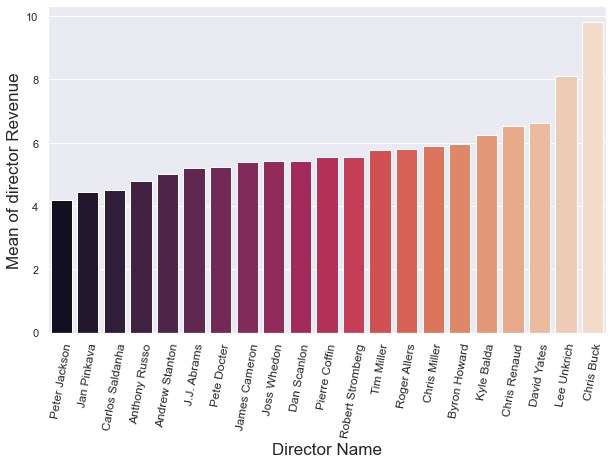

In [90]:
sns.set_style("darkgrid")
dfv = final_df[['director_name','revenue_director_mean']]
dfv =  dfv.drop_duplicates(subset=['director_name'])
dfv.sort_values(by='revenue_director_mean', inplace=True, ascending=False)
dfv.set_index('director_name')
dfv = dfv[20::-1]
plt.figure(figsize = (10,6))
sns.barplot(x='director_name', y='revenue_director_mean', data=dfv, palette="rocket")
plt.xticks(rotation = 80,fontsize = 12)
plt.xlabel("Director Name",fontsize = 17)
plt.ylabel("Mean of director Revenue",fontsize =17)
;

### 3.2: Lead Actor vs Mean Popularity of Lead Actor
This plot shows top 20 first actors with higher popularity.


''

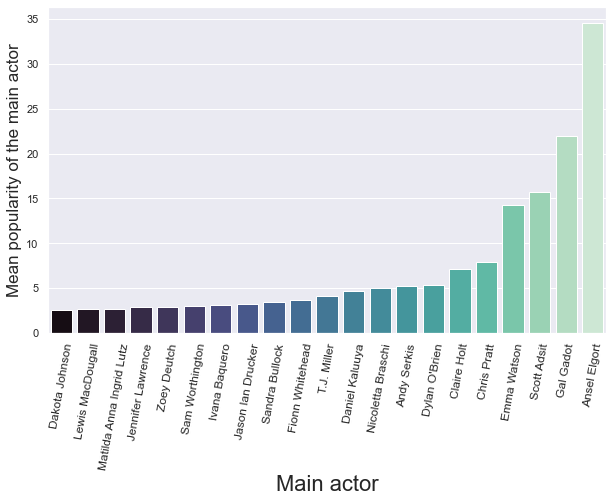

In [91]:
dfv = final_df[['actor_1_name','popularity_actor1_mean']]
dfv =  dfv.drop_duplicates(subset=['actor_1_name'])
dfv.sort_values(by='popularity_actor1_mean', inplace=True, ascending=False)
dfv.set_index('actor_1_name')
dfv = dfv[20::-1]
plt.figure(figsize = (10,6))
sns.barplot(x='actor_1_name', y='popularity_actor1_mean', data=dfv, palette='mako')
plt.xticks(rotation = 80,fontsize = 12)
plt.xlabel("Main actor",fontsize = 22)
plt.ylabel("Mean popularity of the main actor",fontsize =17)
;

### 3.3: Director Gender

This plot shows number of male and female directors. Also number of directors with unknown gender

''

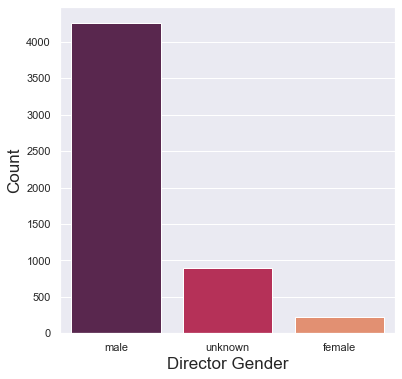

In [92]:
dfv = final_df['director_gender'].map({2:'male',1:'female',0:'unknown'})
plt.figure(figsize = (6,6))
sns.countplot(dfv , palette="rocket", dodge=False)
plt.xlabel("Director Gender",fontsize = 17)
plt.ylabel("Count",fontsize =17)
;

### 3.4: Lead Actor gender

This plot shows number of male and female first actors. Also number of actors with unknown gender

''

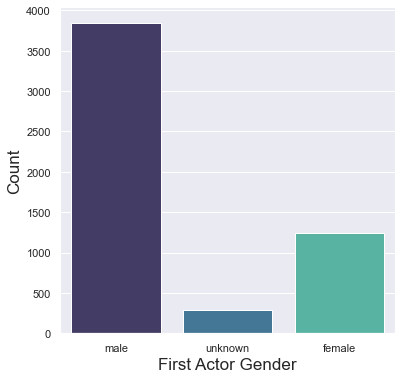

In [93]:
dfv = final_df['actor_1_gender'].map({2:'male',1:'female',0:'unknown'})
plt.figure(figsize = (6,6))
sns.countplot(dfv , palette='mako', dodge=False)
plt.xlabel("First Actor Gender",fontsize = 17)
plt.ylabel("Count",fontsize =17)
;

### 3.5:??
### Data distribution  and visualization of Imdb-rating, genre score, Vote

Bikash??

1. plotting imdb-rating features

In [94]:
# plt.figsize((15,10))
dfr = final_df[['title','imdb_rating']]
# dfr =  dfr.drop_duplicates(subset=['imdb_rating'])
dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)
# dfr.set_index('title')
# dfr = dfr[20::-1]
# #dfv
# # plt.figure(figsize=(60,100))
# dfr.plot(kind='bar',xlabel = 'Title', ylabel='imdb_rating', color='green')
dfr.head(10)

,title,imdb_rating
4426,Dilwale Dulhania Le Jayenge,3.133160
5328,Katyar Kaljat Ghusali,3.021992
5286,Desmundo,3.021992
3491,Stop Making Sense,2.688487
5334,The Guide,2.577319
4765,Tosun Pasha,2.577319
3303,The Godfather,2.466151
1193,The Shawshank Redemption,2.466151
3337,There Goes My Baby,2.466151
2888,Goodbye Pork Pie,2.466151


In [95]:
dfr = final_df[['title','profit_rate','imdb_rating']]
dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)
dfr.head(10)

,title,profit_rate,imdb_rating
4426,Dilwale Dulhania Le Jayenge,7.575758,3.133160
5328,Katyar Kaljat Ghusali,2.933333,3.021992
5286,Desmundo,1.000000,3.021992
3491,Stop Making Sense,4.149102,2.688487
5334,The Guide,0.691289,2.577319
4765,Tosun Pasha,10.875389,2.577319
3303,The Godfather,40.844402,2.466151
1193,The Shawshank Redemption,1.133659,2.466151
3337,There Goes My Baby,0.011763,2.466151
2888,Goodbye Pork Pie,4.666667,2.466151


#### Observation
    1. most of the highest rating movies have missing profit rate
    2. we might need to take the sample from 5363 sample

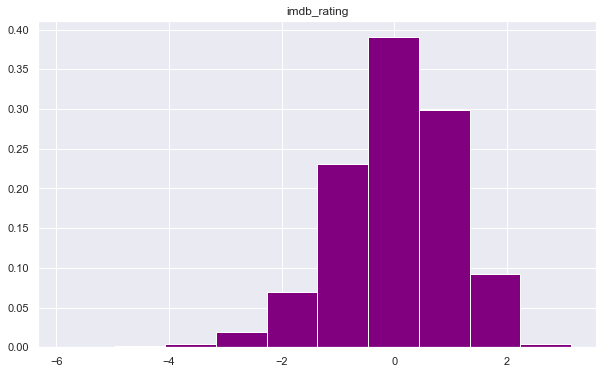

In [96]:
final_df.hist(column = 'imdb_rating',density=True, figsize = (10,6), color="purple");

### 3.6: ??
#### Observation:
maximim movies rating are on range of 5-7

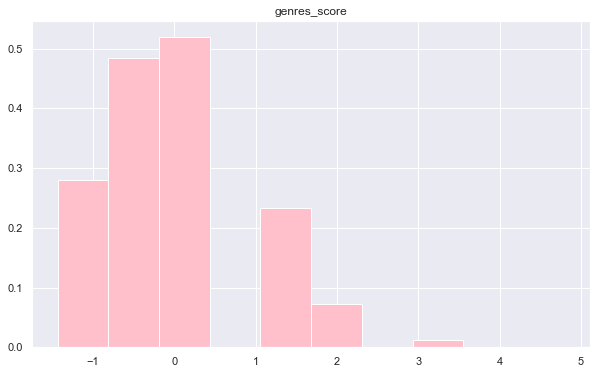

In [97]:
final_df.hist(column = 'genres_score',density=True, figsize = (10,6), color="pink");

### 3.7: ??


Bikash??

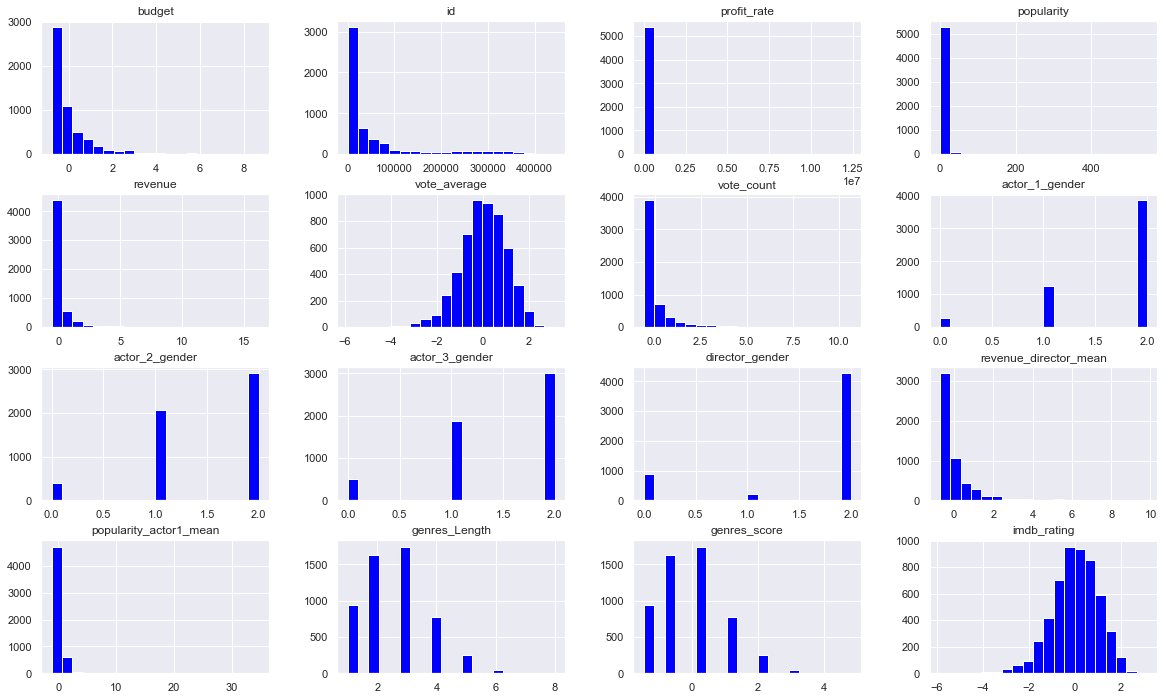

In [98]:
final_df.hist(bins=20,figsize=(20,12),color='b');

### 3.8: ??
Bikash???


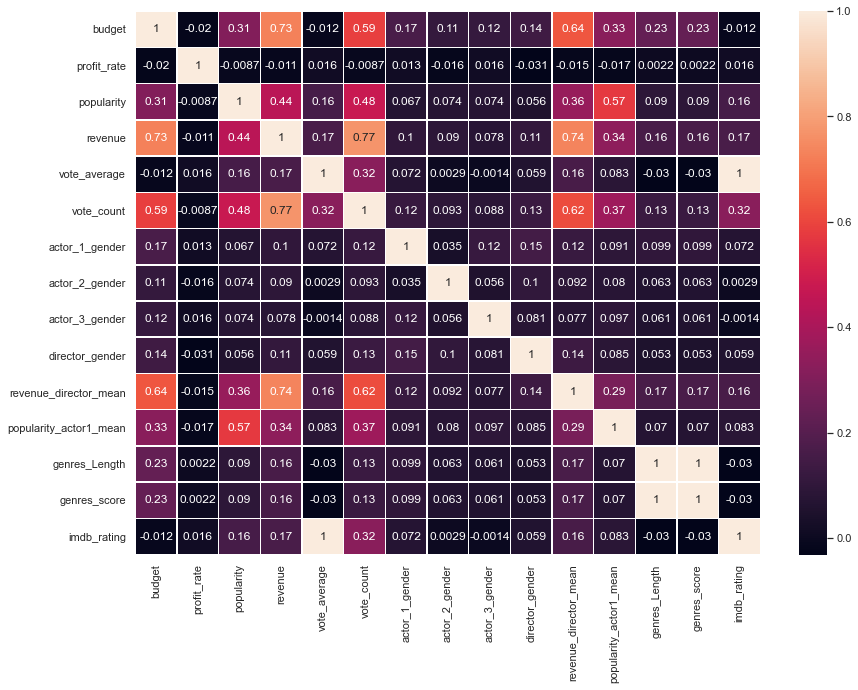

In [99]:
# df = final_df.drop(columns = ['id','budget','revenue'])

df = final_df.drop(columns = ['id'])
plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5);

### 3.9:  movie dataset based on release months
This plot shows number of movies based on release month.

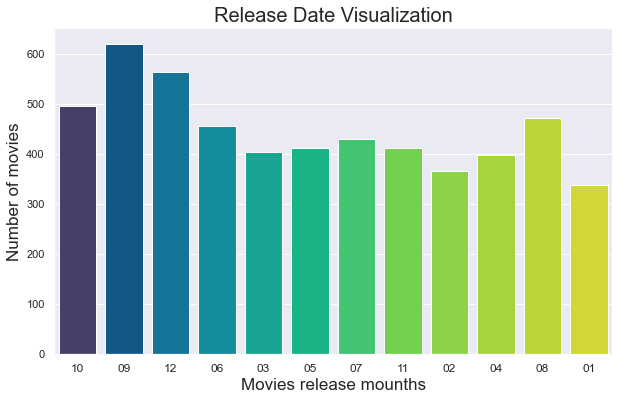

In [100]:
months = []
for i in final_df.release_date:
    dates = str(i).split('-')
    if len(dates)>1:
        months.append(dates[1])

plt.figure(figsize = (10,6))
sns.set_style("darkgrid")
sns.countplot(months, palette=["#433771", "#005b99", "#007eae", "#009fb0", "#00bda2", "#00cd8f", "#2dda6e", "#68e53c", "#8ee930", "#aeed25", "#ccf01d", "#e9f21c"])
plt.xticks(fontsize = 12)
plt.xlabel("Movies release mounths",fontsize =17)
plt.ylabel("Number of movies",fontsize = 17)
plt.title("Release Date Visualization",fontsize = 20)
plt.show()

### 3.10: Profit rate (Budget vs Revenue)
This plot shows the rate of revenue to the budget for the entire dataset.

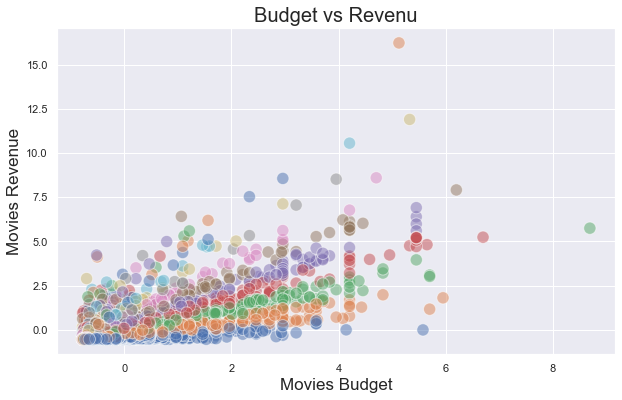

In [101]:
plt.figure(figsize = (10,6))
revenue_rs = final_df.revenue.values.reshape(-1,1)
budget_rs = final_df.budget.values.reshape(-1,1)
rate_int = final_df["profit_rate"].astype("int32")
sns.scatterplot(budget_rs[:,0], revenue_rs[:,0], size=rate_int, sizes=(150, 200), hue=rate_int, alpha=.5, palette="deep", legend=False)
plt.xlabel("Movies Budget",fontsize =17)
plt.ylabel("Movies Revenue",fontsize = 17)
plt.title("Budget vs Revenu",fontsize = 20);

### 3.11: Top 20 popular movies
This plot shows top 20 popular movies based on popularity feture.

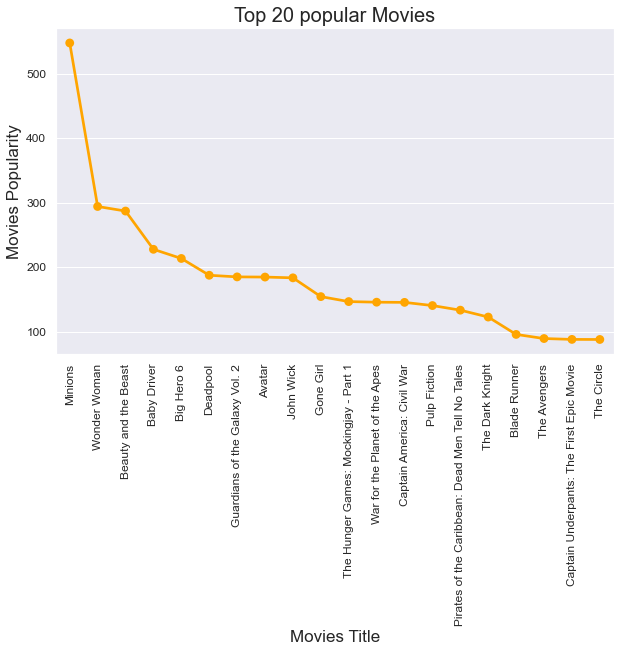

In [102]:
plt.figure(figsize = (10,6))
df_popular = final_df.nlargest(20, ['popularity']) 
sns.pointplot(x ="title",y ="popularity", data=df_popular, color = "orange")
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize=12)
plt.xlabel("Movies Title",fontsize =17)
plt.ylabel("Movies Popularity",fontsize = 17)
plt.title("Top 20 popular Movies",fontsize = 20)
plt.show()

### 3.12: dictribution of profit_rate

* This box plot is for showing the range of data for the profit_rate feature. 
* From this information, we categorize the label (y).

lower_whisker: 5.217391304347826e-07
lower_quartile: 0.7774193548387097
median: 2.008530866666667
upper_quartile: 4.072325388235294
upper_whisker:9.008145


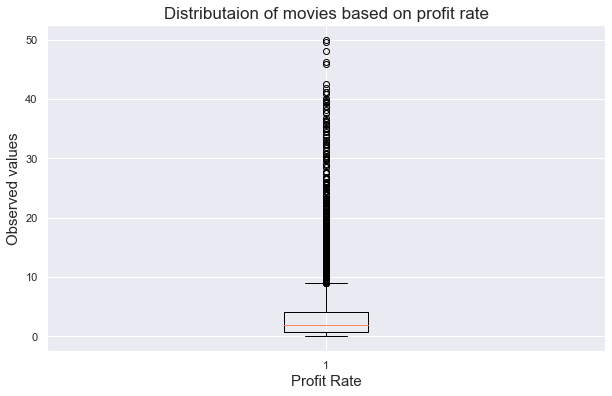

In [103]:
plt.figure(figsize = (10,6))
final_df_smp = final_df.loc[final_df['profit_rate'] <50]
plt.xlabel('Profit Rate',fontsize = 15)
plt.ylabel('Observed values',fontsize = 15)
bp = plt.boxplot(final_df_smp['profit_rate'])
plt.title("Distributaion of movies based on profit rate",fontsize = 17)

whiskers = {}
whiskers['lower_whisker'] = bp['whiskers'][0].get_ydata()[1]
whiskers['lower_quartile'] = bp['boxes'][0].get_ydata()[1]
whiskers['median'] = bp['medians'][0].get_ydata()[1]
whiskers['upper_quartile'] = bp['boxes'][0].get_ydata()[2]
whiskers['upper_whisker'] = bp['whiskers'][1].get_ydata()[1]

print("lower_whisker: " + str(whiskers['lower_whisker']))
print("lower_quartile: " + str(whiskers['lower_quartile']))
print("median: " + str(whiskers['median']))
print("upper_quartile: " + str(whiskers['upper_quartile']))
print("upper_whisker:" + str(whiskers['upper_whisker']))

# 4. phase 4: 
## Preparing X and y sets
In this section we create two X sets. One of them, X1 has the new feature revenue_director_mean, popularity_actor1_mean and imdb_rating. While the other set X2, does not have them.

### 4.1: Labeling and creating target set y
In this part, we assign labels to the data based on 4 range which we got from the distribution of data in terms of profit rate.

In [104]:
y = []
for i in range(len(final_df)):
    if final_df['profit_rate'][i] >= whiskers['lower_whisker'] and final_df['profit_rate'][i] < whiskers['lower_quartile']: 
        y.append(0)
    if final_df['profit_rate'][i] >= whiskers['lower_quartile'] and final_df['profit_rate'][i] < whiskers['median']:
        y.append(1)
    if final_df['profit_rate'][i] >= whiskers['median'] and final_df['profit_rate'][i] < whiskers['upper_quartile']:
        y.append(2)
    if final_df['profit_rate'][i] >= whiskers['upper_quartile']:
        y.append(3)
        
y = np.array(y)


### 4.2: Creating featurs set X1, X2 and Normalizing X1, X2
    X1 has the new features revenue_director_mean, popularity_actor1_mean and imdb_rating plus other columns.
    X2 has other features but does not have new featurs.

In [105]:
final_df['release_date'] = pd.to_datetime(final_df['release_date']).dt.strftime("%Y%m%d").astype(int)
#X1
x1 = final_df.drop(columns = ['id','actor_1_name','actor_2_name','actor_3_name','director_name','title','genres',
                              'profit_rate'])
X1 = x1.to_numpy()
X1_norm = sklearn.preprocessing.StandardScaler().fit_transform(X1)

#X2
x2 = final_df.drop(columns = ['id','actor_1_name','actor_2_name','actor_3_name','director_name','title','genres',
                              'profit_rate','revenue_director_mean','popularity_actor1_mean','imdb_rating'])
X2 = x2.to_numpy()
X2_norm = sklearn.preprocessing.StandardScaler().fit_transform(X2)




#y = final_df_without_nan["profit_rate"].to_numpy()
print('Shape of X1:',X1_norm.shape,'type of X1:',X1_norm.dtype)
print('Shape of X2:',X2_norm.shape,'type of X2:',X2_norm.dtype)

print('Shape of y:',y.shape,'type of y:',y.dtype)


Shape of X1: (5376, 15) type of X1: float64
Shape of X2: (5376, 12) type of X2: float64
Shape of y: (5376,) type of y: int64


### 4.3:
Somaye??

number of y equal to 0 :  1322
number of y equal to 1 :  1322
number of y equal to 2 :  1322
number of y equal to 3 :  1410


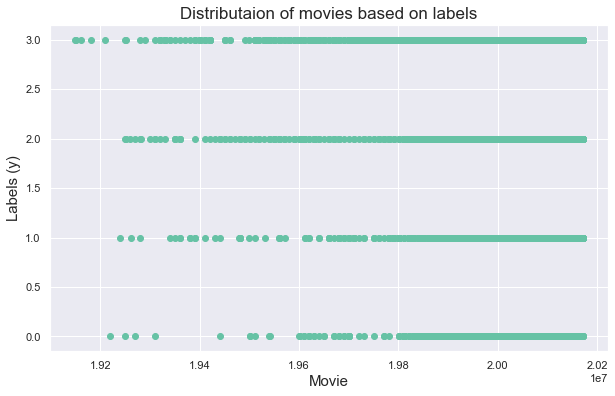

In [106]:
plt.figure(figsize = (10,6))
plt.scatter(final_df['release_date'].to_numpy(),y)
plt.xlabel('Movie',fontsize = 15)
plt.ylabel('Labels (y)',fontsize = 15)
plt.title("Distributaion of movies based on labels",fontsize = 17)

print('number of y equal to 0 : ',np.count_nonzero(y ==0 , axis=0))
print('number of y equal to 1 : ',np.count_nonzero(y ==1 , axis=0))
print('number of y equal to 2 : ',np.count_nonzero(y ==2 , axis=0))
print('number of y equal to 3 : ',np.count_nonzero(y ==3 , axis=0))


# 5. phase 5: 
## Creating training, validating and testing dataset
In this section we create two training, validating and testing dataset for X1 and X2

### 5.1: Spliting Data
#### Splitting data to train, test and validation which each one comprises respectively 60%, 20%, 20% of original data.
* tarining data set: X_trn, y_trn
* validating data set: X_vld, y_vld
* testing data set: X_tst, y_ts

In [107]:
# X1 includes new features
X1_train, X1_temp, y1_train, y1_temp = sklearn.model_selection.train_test_split(X1_norm, y, 
                                                                    train_size=0.6, test_size=0.4, random_state=0)
X1_val, X1_test, y1_val, y1_test = sklearn.model_selection.train_test_split(X1_temp, y1_temp, 
                                                                    train_size=0.5, test_size=0.5, random_state=0)

# X2 doesn't include new features
X2_train, X2_temp, y2_train, y2_temp = sklearn.model_selection.train_test_split(X2_norm, y, 
                                                                    train_size=0.6, test_size=0.4, random_state=0)
X2_val, X2_test, y2_val, y2_test = sklearn.model_selection.train_test_split(X2_temp, y2_temp, 
                                                                    train_size=0.5, test_size=0.5, random_state=0)

# 6. phase 6: 
## Training Phase
In this section we train our models and evaluate their performance. We choose our parameters based on hyperparameters method.

### 6.1: Define necessary functions to find best parameter and related plot functions
The point of this section is to use hyperparameter search to get the best estimator


In [108]:
def train_estimators_randomized(XX, yy, estimator_type, param_name, param_vals, **kwargs):
    
    param_dic= {}
    param_dic[param_name] = param_vals
    clsObj = estimator_type()
    clsObj.set_params(**kwargs)
    rscv = sklearn.model_selection.RandomizedSearchCV(clsObj, param_dic, verbose=1, cv=3, n_iter=16, return_train_score=True).fit(XX, yy)
        
    return rscv, rscv.cv_results_

In [109]:
def plot_RandomizedSearch_scores(estimators_result, x_axis, title = 'Best estimator'):
    scores_df = pd.DataFrame(estimators_result).sort_values(by='rank_test_score')
    plt.xlabel(x_axis, fontsize = 15)
    plt.ylabel('Score', fontsize = 15)
    plt.title(title, fontsize = 17)
    plt.scatter(scores_df[x_axis], scores_df['mean_train_score'], s=38, color='purple', marker='x', linestyle='solid')

### 6.2: Defining necessary functions to define multiple estimators, defining their test, validate and train scores and  ploting the scopres
The point of this section is to define multiple estimators, defining their test, validate and train scores and  ploting the scopres.
    We use the best_parameters range that we get from hyperparameter search to trains a set of estimator


#### train_estimators
    train_estimators is a function that trains multiple instances of `estimator_type` on (X, y) by setting argument

In [110]:
def train_estimators(XX, yy, estimator_type, param_name, param_vals, **kwargs):
    #train_estimators is a function that trains multiple instances of `estimator_type` on (X, y) by setting argument

    clf=[]
    for p in param_vals:
        es=estimator_type(**{param_name: p})
        es.set_params(**kwargs)
        es.fit(XX,yy)
        clf.append(es)
        
    return clf

#### score_estimators
    score_estimators is a function that scores each estimator on (X, y), returning a list of scores.

In [111]:
def score_estimators(XX, yy, estimators):
    #score_estimators is a function that scores each estimator on (X, y), returning a list of scores.
    score=[]
    for clf in estimators:
        s=clf.score(XX,yy)
        score.append(s)
    return score

#### plot_estimator_scores
    plot_estimator_scores plots the training, validation, and testing scores of a list of estimators.

In [112]:
def plot_estimator_scores(estimators1,estimators2, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    s1_trn =  score_estimators(X1_train, y1_train, estimators1)
    s1_val =  score_estimators(X1_val, y1_val, estimators1)
    s1_tst =  score_estimators(X1_test, y1_test, estimators1)
    
    s2_trn =  score_estimators(X2_train, y2_train, estimators2)
    s2_val =  score_estimators(X2_val, y2_val, estimators2)
    s2_tst =  score_estimators(X2_test, y2_test, estimators2)
    
    fig, ax = plt.subplots(1,2,figsize=(14, 6))
    plt.setp(ax, xticks=np.arange(len(param_vals)), xticklabels=param_vals, xlabel=param_name, ylabel='score')

    ax[0].plot(np.arange(len(param_vals)), s1_trn, 'o-', color='green', label = "train")
    ax[0].plot(np.arange(len(param_vals)), s1_val, 'o-', color='red', label = "validate")
    ax[0].plot(np.arange(len(param_vals)), s1_tst, 'k:', label = "test")
#     ax[0].xticks(np.arange(len(param_vals)),param_vals)
#     ax[0].xlabel(param_name)
#     ax[0].ylabel('score')
    ax[0].legend()
    ax[0].set_title("X1 includes new features")
    
    ax[1].plot(np.arange(len(param_vals)), s2_trn, 'o-', color='green', label = "train")
    ax[1].plot(np.arange(len(param_vals)), s2_val, 'o-', color='red', label = "validate")
    ax[1].plot(np.arange(len(param_vals)), s2_tst, 'k:', label = "test")
#     ax[1].xticks(np.arange(len(param_vals)),param_vals)
    ax[1].legend()
    ax[1].set_title("X2 doesn't include new features")

#     plt.xlabel(param_name)
#     plt.ylabel('score')


    fig.suptitle(estimators1[0].__class__.__name__+" score vs "+param_name)
#     plt.text(4,0.48,'train:'+str(round(ytrn[int(abs(len(ytrn)/2))],3)),color='g')
#     plt.text(4,0.44,'validate:'+str(round(yval[int(abs(len(yval)/2))],3)),color='r')
#     plt.text(4,0.4,'test:'+str(round(ytst[int(abs(len(ytst)/2))],3)),color='k')
    #return score stimator
    return estimators1[s1_val.index(max(s1_val))], estimators2[s2_val.index(max(s2_val))]

In [113]:
def plot_estimator_confusion(estimators1,estimators2):
    sns.set_style("white")
    f, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    cfm1 = sklearn.metrics.confusion_matrix(estimators1.predict(X1_test), y1_test)
    cfm1Display = sklearn.metrics.ConfusionMatrixDisplay(cfm1, display_labels=['loss','typical', 'successful', 'hit'])
    cfm1Display.plot(ax=axes[0])
    cfm1Display.ax_.set_title("confusion matrix of "+ estimators1.__class__.__name__+ " for X1", fontsize = 17, wrap=True, y=1.1)

    cfm2 = sklearn.metrics.confusion_matrix(estimators2.predict(X2_test), y2_test)
    cfm2Display2 = sklearn.metrics.ConfusionMatrixDisplay(cfm2, display_labels=['loss','typical', 'successful', 'hit'])
    cfm2Display2.plot(ax=axes[1])
    cfm2Display2.ax_.set_title("confusion matrix of "+ estimators2.__class__.__name__+ " for X2", fontsize = 17, wrap=True, y=1.1)


### 6.3 Logistic Regression Model

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished


Best estimator for X1_train: LogisticRegression(C=0.8301224991889226, random_state=0)
Best estimator for X2_train: LogisticRegression(C=0.9655368053556276, random_state=0)


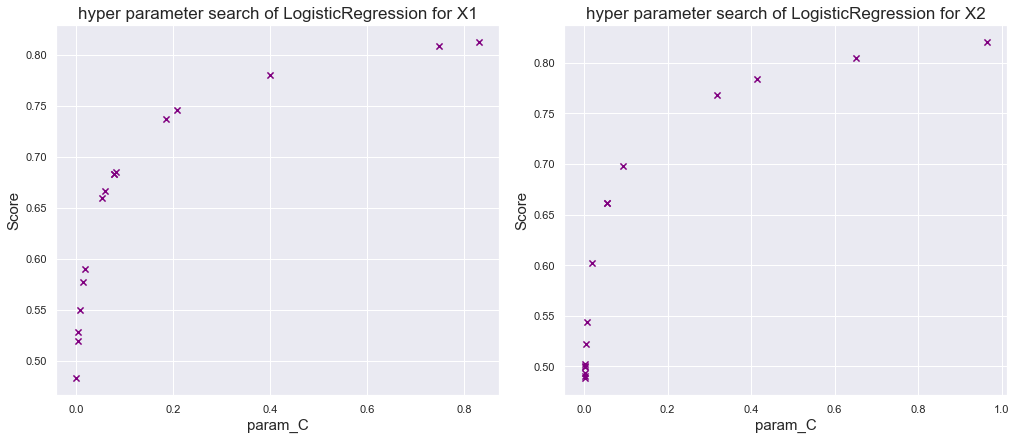

In [114]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

C = scipy.stats.reciprocal(0.001, 1)

lr1_r, lr1_estimators_result = train_estimators_randomized(X1_train, y1_train, sklearn.linear_model.LogisticRegression,
                                                         'C', C,random_state=0)
fig.add_subplot(spec[0, 0])
plot_RandomizedSearch_scores(lr1_estimators_result, 'param_C',"hyper parameter search of LogisticRegression for X1")

fig.add_subplot(spec[0, 1])
lr2_r, lr2_estimators_result = train_estimators_randomized(X2_train, y2_train, sklearn.linear_model.LogisticRegression,
                                                         'C', C,random_state=0)
plot_RandomizedSearch_scores(lr2_estimators_result, 'param_C',"hyper parameter search of LogisticRegression for X2")
print("Best estimator for X1_train:", lr1_r.best_estimator_)
print("Best estimator for X2_train:",  lr2_r.best_estimator_)

In [145]:
lreg1_estimators = train_estimators(X1_train, y1_train, sklearn.linear_model.LogisticRegression,
                                   'C', [0.001, 0.01, 0.5, 0.85, 0.9, 1],  
                                   random_state=0, max_iter=1000)
lreg2_estimators = train_estimators(X2_train, y2_train, sklearn.linear_model.LogisticRegression,
                                   'C', [0.001, 0.01, 0.5, 0.85, 0.9, 1],  
                                   random_state=0, max_iter=1000)

print("trained estimators for X1:")
print(lreg1_estimators)
print("trained estimators for X2: ")
print(lreg2_estimators)

trained estimators for X1:
[LogisticRegression(C=0.001, max_iter=1000, random_state=0), LogisticRegression(C=0.01, max_iter=1000, random_state=0), LogisticRegression(C=0.5, max_iter=1000, random_state=0), LogisticRegression(C=0.85, max_iter=1000, random_state=0), LogisticRegression(C=0.9, max_iter=1000, random_state=0), LogisticRegression(C=1, max_iter=1000, random_state=0)]
trained estimators for X2: 
[LogisticRegression(C=0.001, max_iter=1000, random_state=0), LogisticRegression(C=0.01, max_iter=1000, random_state=0), LogisticRegression(C=0.5, max_iter=1000, random_state=0), LogisticRegression(C=0.85, max_iter=1000, random_state=0), LogisticRegression(C=0.9, max_iter=1000, random_state=0), LogisticRegression(C=1, max_iter=1000, random_state=0)]


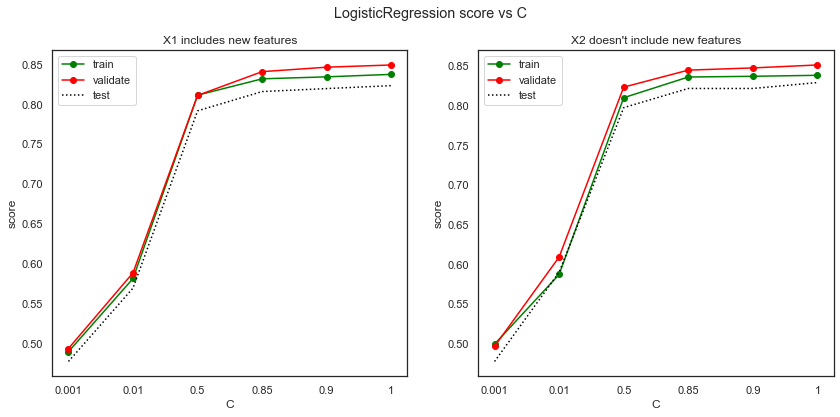

In [146]:
best_lr1, best_lr2 = plot_estimator_scores(lreg1_estimators, lreg2_estimators, 'C', 
                                           [0.001, 0.01, 0.5, 0.85, 0.9, 1])

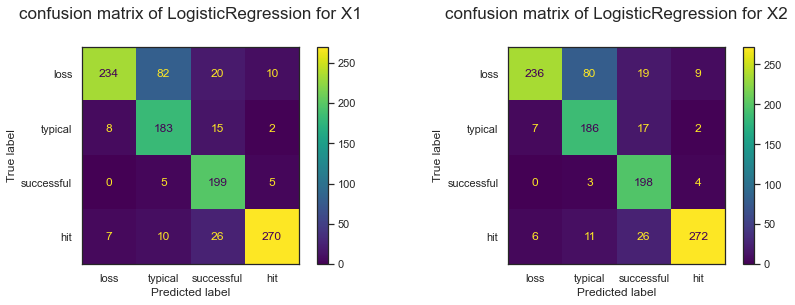

In [147]:
plot_estimator_confusion(best_lr1, best_lr2)


### 6.4: Neural Network MLPerceptron Model

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    6.0s finished


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    5.3s finished


Best estimator for X1_train: MLPClassifier(batch_size=450, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0)
Best estimator for X2_train: MLPClassifier(batch_size=200, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0)


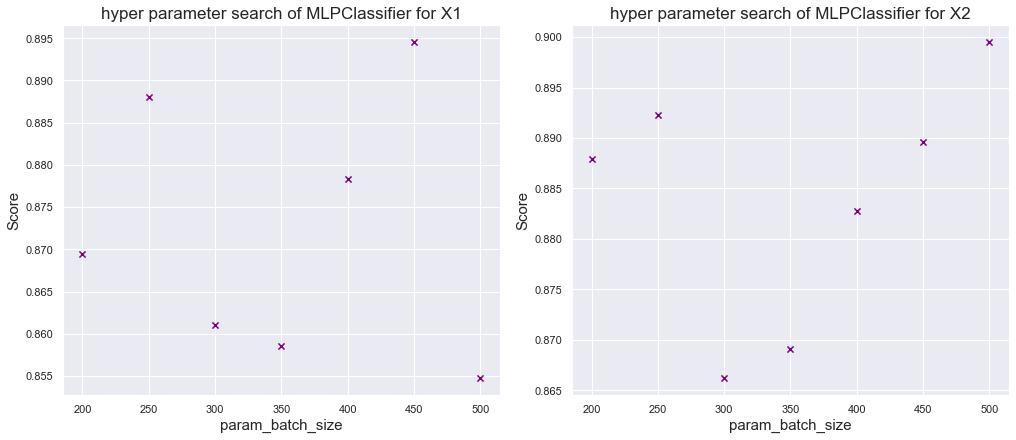

In [118]:
# batch_size = np.arange(200,800,50)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

batch_size = [200,250,300,350,400,450,500]
mlp1, mlp1_estimators_result = train_estimators_randomized(X1_train, y1_train, sklearn.neural_network.MLPClassifier,
                                                         'batch_size', batch_size, random_state=0, hidden_layer_sizes=(30,20),solver='adam',learning_rate_init=0.09, momentum=0.9)
fig.add_subplot(spec[0, 0])
plot_RandomizedSearch_scores(mlp1_estimators_result, 'param_batch_size',"hyper parameter search of MLPClassifier for X1")

mlp2, mlp2_estimators_result = train_estimators_randomized(X2_train, y2_train, sklearn.neural_network.MLPClassifier,
                                                         'batch_size', batch_size, random_state=0, hidden_layer_sizes=(30,20),solver='adam',learning_rate_init=0.09, momentum=0.9)
fig.add_subplot(spec[0, 1])
plot_RandomizedSearch_scores(mlp2_estimators_result, 'param_batch_size',"hyper parameter search of MLPClassifier for X2")

print("Best estimator for X1_train:", mlp1.best_estimator_)
print("Best estimator for X2_train:",  mlp2.best_estimator_)




In [119]:
mlp1_estimator = train_estimators(X1_train, y1_train, sklearn.neural_network.MLPClassifier,
                                    'batch_size', batch_size, random_state=0, hidden_layer_sizes=(30,20),
                                    solver='adam',learning_rate_init=0.09,momentum=0.9)
mlp2_estimator = train_estimators(X2_train, y2_train, sklearn.neural_network.MLPClassifier,
                                    'batch_size', batch_size, random_state=0, hidden_layer_sizes=(30,20),
                                    solver='adam',learning_rate_init=0.09,momentum=0.9)

print("trained estimators for X1:")
print(mlp1_estimator)
print("trained estimators for X2: ")
print(mlp2_estimator)

trained estimators for X1:
[MLPClassifier(batch_size=200, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0), MLPClassifier(batch_size=250, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0), MLPClassifier(batch_size=300, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0), MLPClassifier(batch_size=350, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0), MLPClassifier(batch_size=400, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0), MLPClassifier(batch_size=450, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0), MLPClassifier(batch_size=500, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0)]
trained estimators for X2: 
[MLPClassifier(batch_size=200, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0), MLPClassifier(batch_siz

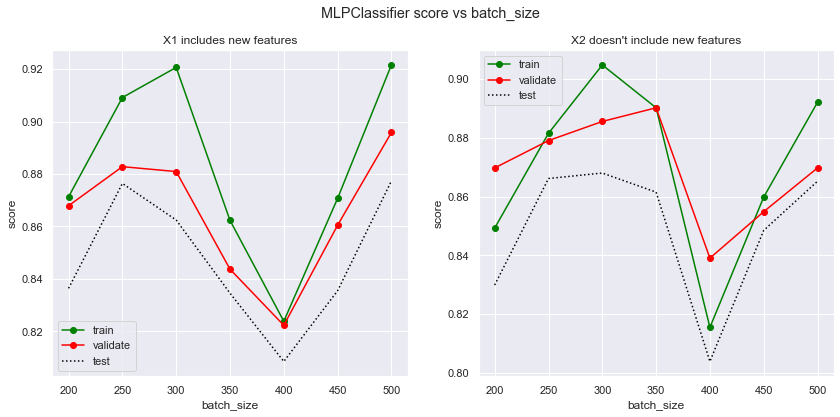

In [120]:
best_neural1, best_neural2 = plot_estimator_scores(mlp1_estimator,mlp2_estimator, 'batch_size', batch_size)

In [121]:
#Bikash ?? Can we omit this part?
# ytrn =  score_estimators(X_train, y_train, mlp_estimator)
# print(ytrn,"\n")
# ytest = score_estimators(X_test, y_test, mlp_estimator)
# print(ytest,"\n")

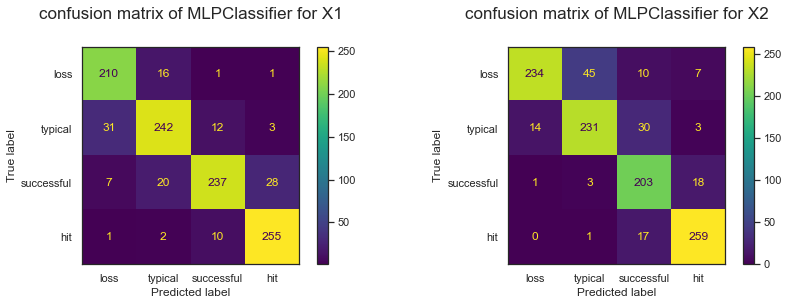

In [122]:
plot_estimator_confusion(best_neural1, best_neural2)



# y_pred = mlp.best_estimator_.predict(X_test_norm)
# data = confusion_matrix(y_test, y_pred)
# df = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
# df.index.name = 'Actual'
# df.columns.name = 'Predicted'
# plt.figure(figsize = (10,6))
# sns.set(font_scale=1.7)
# sns.heatmap(df, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')

### 6.5: SVM

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   11.0s finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    9.7s finished


Best estimator for X1_train: SVC(C=426.17756861138946, gamma=0.001, max_iter=10000, random_state=0)
Best estimator for X2_train: SVC(C=426.17756861138946, gamma=0.001, max_iter=10000, random_state=0)


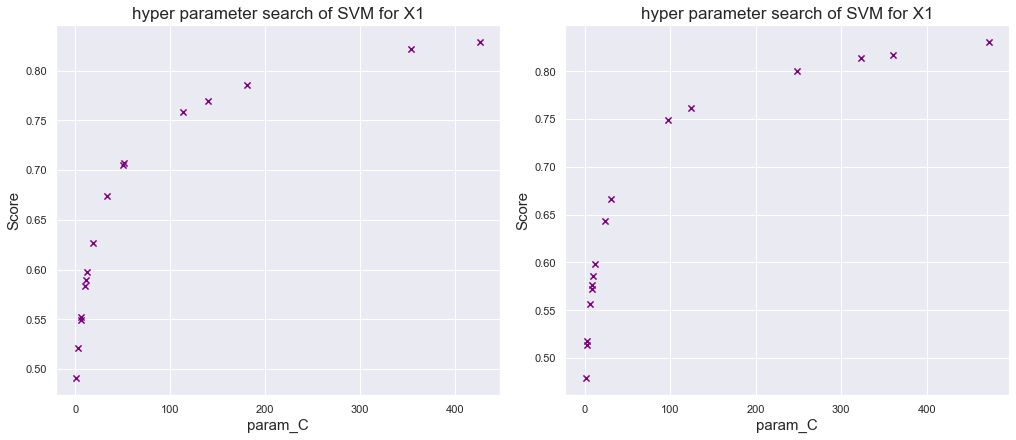

In [123]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

C = scipy.stats.reciprocal(1, 500)
svm1, svm1_estimators_result = train_estimators_randomized(X1_train, y1_train, sklearn.svm.SVC, 'C', C, gamma=0.001, max_iter=10000, random_state=0)

fig.add_subplot(spec[0, 0])
plot_RandomizedSearch_scores(svm1_estimators_result, 'param_C',"hyper parameter search of SVM for X1")

svm2, svm2_estimators_result = train_estimators_randomized(X2_train, y2_train, sklearn.svm.SVC, 'C', C, gamma=0.001, max_iter=10000, random_state=0)
fig.add_subplot(spec[0, 1])
plot_RandomizedSearch_scores(svm2_estimators_result, 'param_C',"hyper parameter search of SVM for X1")

print("Best estimator for X1_train:", svm1.best_estimator_)
print("Best estimator for X2_train:",  svm1.best_estimator_)




In [148]:
svm1_estimators = train_estimators(X1_train, y1_train, sklearn.svm.SVC,'C', [0.1, 10, 50, 100, 250, 350, 425, 500], 
                                  gamma=0.001, max_iter=1000, random_state=0)

svm2_estimators = train_estimators(X2_train, y2_train, sklearn.svm.SVC,'C', [0.1, 10, 50, 100, 250, 350, 425, 500], 
                                  gamma=0.001, max_iter=1000, random_state=0)

print("trained estimators for X1:")
print(svm1_estimators)
print("trained estimators for X2: ")
print(svm2_estimators)

trained estimators for X1:
[SVC(C=0.1, gamma=0.001, max_iter=1000, random_state=0), SVC(C=10, gamma=0.001, max_iter=1000, random_state=0), SVC(C=50, gamma=0.001, max_iter=1000, random_state=0), SVC(C=100, gamma=0.001, max_iter=1000, random_state=0), SVC(C=250, gamma=0.001, max_iter=1000, random_state=0), SVC(C=350, gamma=0.001, max_iter=1000, random_state=0), SVC(C=425, gamma=0.001, max_iter=1000, random_state=0), SVC(C=500, gamma=0.001, max_iter=1000, random_state=0)]
trained estimators for X2: 
[SVC(C=0.1, gamma=0.001, max_iter=1000, random_state=0), SVC(C=10, gamma=0.001, max_iter=1000, random_state=0), SVC(C=50, gamma=0.001, max_iter=1000, random_state=0), SVC(C=100, gamma=0.001, max_iter=1000, random_state=0), SVC(C=250, gamma=0.001, max_iter=1000, random_state=0), SVC(C=350, gamma=0.001, max_iter=1000, random_state=0), SVC(C=425, gamma=0.001, max_iter=1000, random_state=0), SVC(C=500, gamma=0.001, max_iter=1000, random_state=0)]


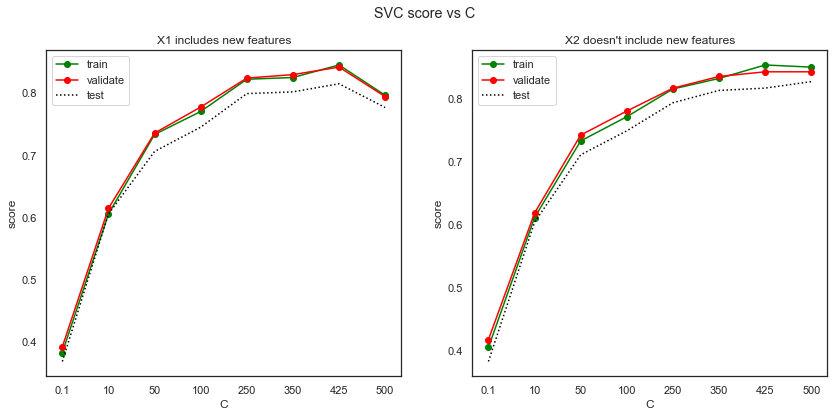

In [149]:
best_svm1,best_svm2 = plot_estimator_scores(svm1_estimators,svm2_estimators, 'C', 
                                            [0.1, 10, 50, 100, 250, 350, 425, 500])


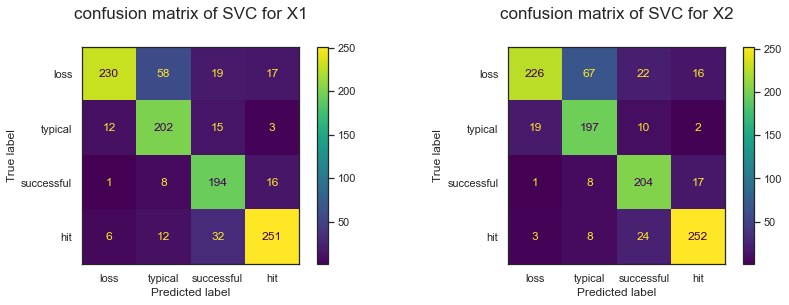

In [150]:
plot_estimator_confusion(best_svm1, best_svm2)

### 6.6: Random Forest

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   10.4s finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    9.7s finished


Best estimator for X1_train: RandomForestClassifier(max_depth=34.472822864348444, random_state=0)
Best estimator for X2_train: RandomForestClassifier(max_depth=56.65920193403171, random_state=0)


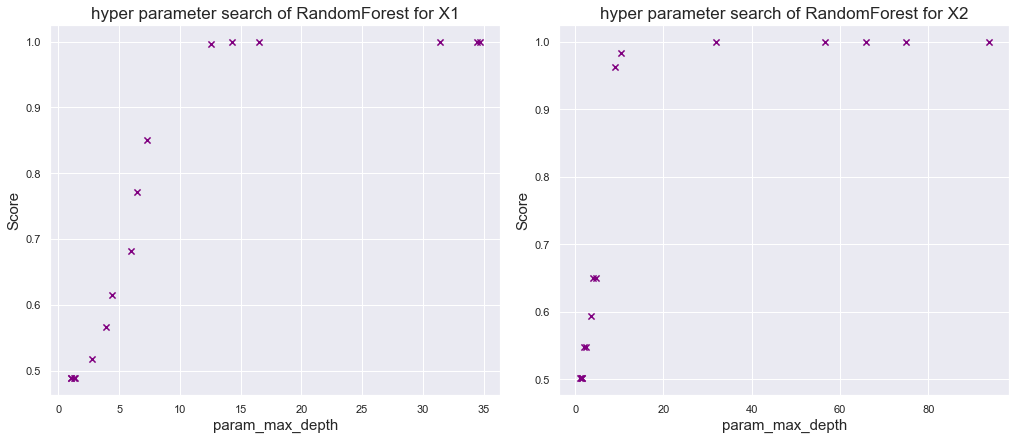

In [127]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

max_depth = scipy.stats.reciprocal(1, 100)
rf1_r, rf1_estimators_result = train_estimators_randomized(X1_train, y1_train, sklearn.ensemble.RandomForestClassifier, 'max_depth', max_depth, random_state=0)
fig.add_subplot(spec[0, 0])
plot_RandomizedSearch_scores(rf1_estimators_result, 'param_max_depth', "hyper parameter search of RandomForest for X1")

rf2_r, rf2_estimators_result = train_estimators_randomized(X2_train, y2_train, sklearn.ensemble.RandomForestClassifier, 'max_depth', max_depth, random_state=0)
fig.add_subplot(spec[0, 1])
plot_RandomizedSearch_scores(rf2_estimators_result, 'param_max_depth', "hyper parameter search of RandomForest for X2")

print("Best estimator for X1_train:", rf1_r.best_estimator_)
print("Best estimator for X2_train:",  rf2_r.best_estimator_)

In [151]:
rf1_estimators = train_estimators(X1_train, y1_train, sklearn.ensemble.RandomForestClassifier, 
                                 'max_depth', [1, 5, 15, 25 ,50 ,100], random_state=0)

rf2_estimators = train_estimators(X2_train, y2_train, sklearn.ensemble.RandomForestClassifier, 
                                 'max_depth', [1, 5, 15, 25 ,50 ,100], random_state=0)


print("trained estimators for X1:")
print(rf1_estimators)
print("trained estimators for X2: ")
print(rf2_estimators)

trained estimators for X1:
[RandomForestClassifier(max_depth=1, random_state=0), RandomForestClassifier(max_depth=5, random_state=0), RandomForestClassifier(max_depth=15, random_state=0), RandomForestClassifier(max_depth=25, random_state=0), RandomForestClassifier(max_depth=50, random_state=0), RandomForestClassifier(max_depth=100, random_state=0)]
trained estimators for X2: 
[RandomForestClassifier(max_depth=1, random_state=0), RandomForestClassifier(max_depth=5, random_state=0), RandomForestClassifier(max_depth=15, random_state=0), RandomForestClassifier(max_depth=25, random_state=0), RandomForestClassifier(max_depth=50, random_state=0), RandomForestClassifier(max_depth=100, random_state=0)]


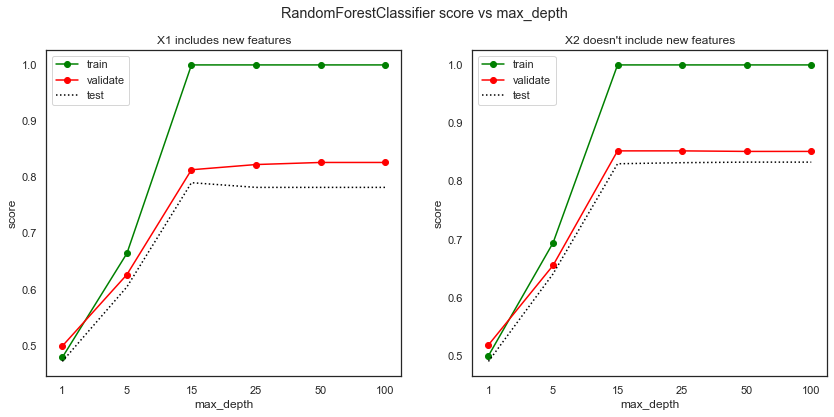

In [152]:
best_randomforest1, best_randomforest2 = plot_estimator_scores(rf1_estimators,rf2_estimators, 'max_depth',
                                                               [1, 5, 15, 25 ,50 ,100])

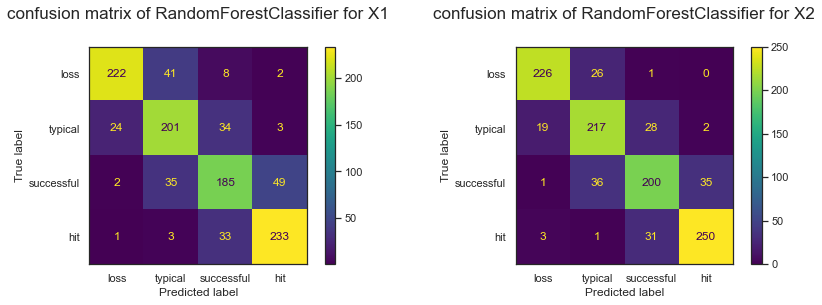

In [153]:
plot_estimator_confusion(best_randomforest1, best_randomforest2)

### 6.7: Decision Tree

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Best estimator for X1_train: DecisionTreeClassifier(max_depth=49.45876234786196, random_state=0,
                       splitter='random')
Best estimator for X2_train: DecisionTreeClassifier(max_depth=22.82587766586422, random_state=0,
                       splitter='random')


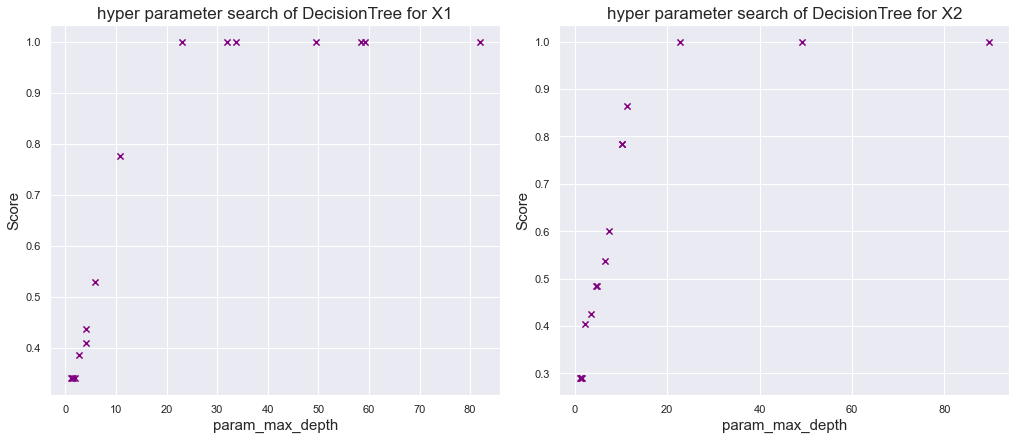

In [131]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

max_depth = scipy.stats.reciprocal(1, 100)
tr1_r, tr1_estimators_result = train_estimators_randomized(X1_train, y1_train, sklearn.tree.DecisionTreeClassifier,
                                                            'max_depth', max_depth,  splitter='random',random_state=0)
fig.add_subplot(spec[0, 0])
plot_RandomizedSearch_scores(tr1_estimators_result, 'param_max_depth',"hyper parameter search of DecisionTree for X1")

tr2_r, tr2_estimators_result = train_estimators_randomized(X2_train, y2_train, sklearn.tree.DecisionTreeClassifier,
                                                            'max_depth', max_depth,  splitter='random',random_state=0)
fig.add_subplot(spec[0, 1])
plot_RandomizedSearch_scores(tr2_estimators_result, 'param_max_depth', "hyper parameter search of DecisionTree for X2")

print("Best estimator for X1_train:", tr1_r.best_estimator_)
print("Best estimator for X2_train:",  tr2_r.best_estimator_)

In [156]:
tree1_estimators = train_estimators(X1_train, y1_train, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [1, 5, 15, 20, 50, 75, 90], splitter='random', random_state=0)
tree2_estimators = train_estimators(X2_train, y2_train, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [1, 5, 15, 20, 50, 75, 90], splitter='random', random_state=0)


print("trained estimators for X1:")
print(tree1_estimators)
print("trained estimators for X2: ")
print(tree2_estimators)

trained estimators for X1:
[DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=15, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=75, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=90, random_state=0, splitter='random')]
trained estimators for X2: 
[DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=15, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=75, random_state=0, splitter='random')

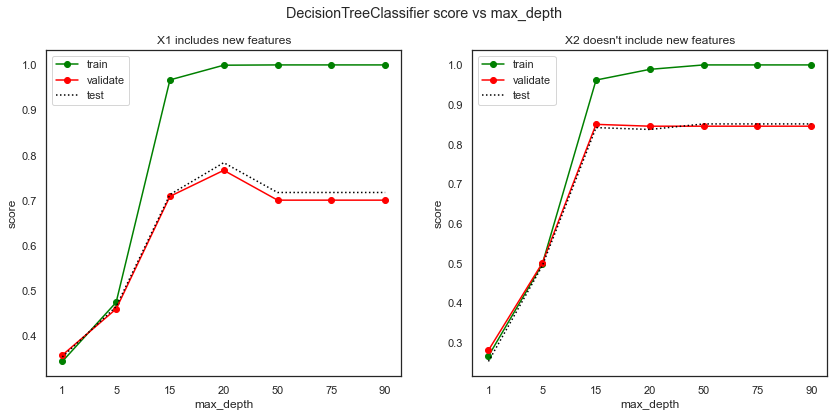

In [157]:
best_tree1, best_tree2 = plot_estimator_scores(tree1_estimators,tree2_estimators, 'max_depth', 
                                               [1, 5, 15, 20, 50, 75, 90])


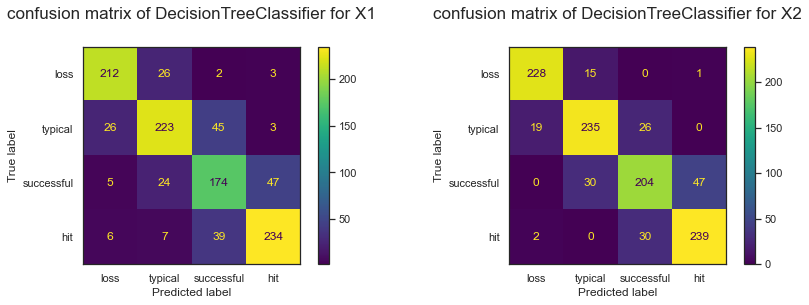

In [158]:
plot_estimator_confusion(best_tree1, best_tree2)

### 6.8: AdaBooster

Executing this cell take around 7-8min , so we commented this part.
The result is like the following image:
<img src="adabooster.png">

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  4.0min finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.6min finished


Best estimator for X1_train: AdaBoostClassifier(algorithm='SAMME', n_estimators=4090, random_state=0)
Best estimator for X2_train: AdaBoostClassifier(algorithm='SAMME', n_estimators=4093, random_state=0)


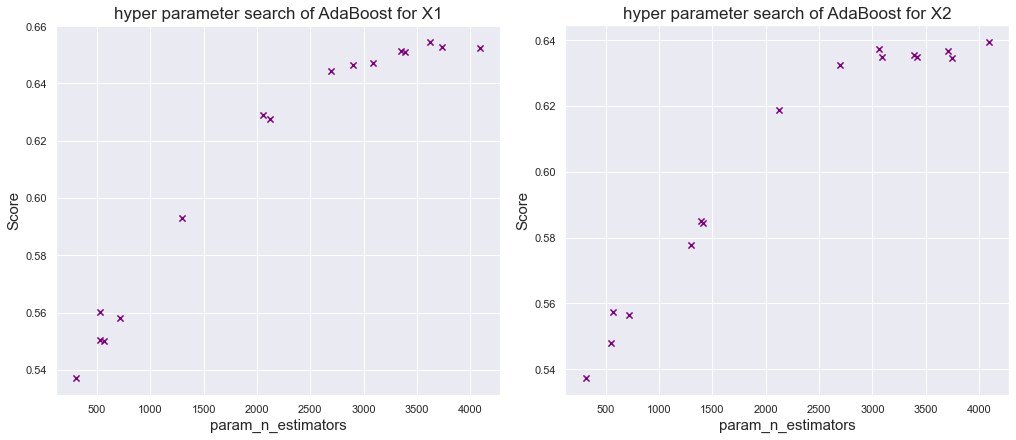

In [135]:
# sns.set_style("darkgrid")
# fig = plt.figure(figsize=(14, 6), constrained_layout=True)
# spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig)


# n_est = np.random.randint(4, 4096+1, 32)
# ad1_r, ad1_estimators_result = train_estimators_randomized(X1_train, y1_train, sklearn.ensemble.AdaBoostClassifier,
#                                                             'n_estimators', n_est, algorithm='SAMME', random_state=0)
# fig.add_subplot(spec[0, 0])
# plot_RandomizedSearch_scores(ad1_estimators_result, 'param_n_estimators', "hyper parameter search of AdaBoost for X1")

# ad2_r, ad2_estimators_result = train_estimators_randomized(X2_train, y2_train, sklearn.ensemble.AdaBoostClassifier,
#                                                             'n_estimators', n_est, algorithm='SAMME', random_state=0)
# fig.add_subplot(spec[0, 1])
# plot_RandomizedSearch_scores(ad2_estimators_result, 'param_n_estimators',"hyper parameter search of AdaBoost for X2")


# print("Best estimator for X1_train:", ad1_r.best_estimator_)
# print("Best estimator for X2_train:",  ad2_r.best_estimator_)

In [159]:
ada1_estimators = train_estimators(X1_train, y1_train, sklearn.ensemble.AdaBoostClassifier,
                                   'n_estimators', [4, 128, 256, 512, 1024, 2048, 4093], algorithm='SAMME', random_state=0)
ada2_estimators = train_estimators(X2_train, y2_train, sklearn.ensemble.AdaBoostClassifier,
                                   'n_estimators', [4, 128, 256, 512, 1024, 2048, 4093], algorithm='SAMME', random_state=0)


print("trained estimators for X1:")
print(ada1_estimators)
print("trained estimators for X2: ")
print(ada2_estimators)

trained estimators for X1:
[AdaBoostClassifier(algorithm='SAMME', n_estimators=4, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=128, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=256, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=512, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=1024, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=2048, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=4093, random_state=0)]
trained estimators for X2: 
[AdaBoostClassifier(algorithm='SAMME', n_estimators=4, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=128, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=256, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=512, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=1024, random_state=0), AdaBoostClassifier(algorithm='SAMME', n_estimators=2048, random_sta

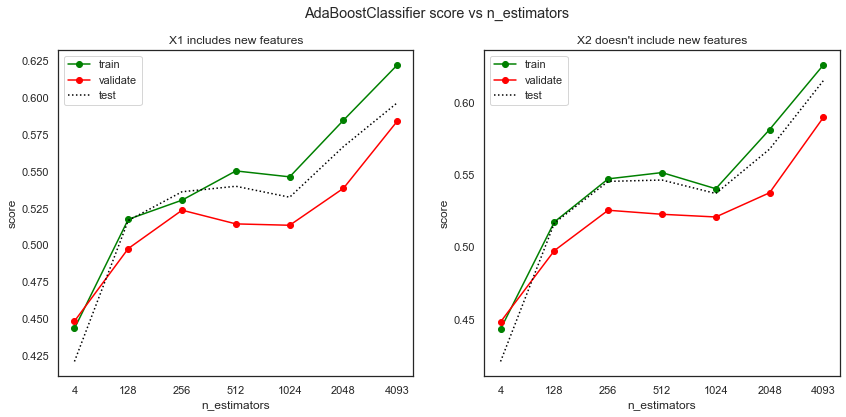

In [160]:
best_ada1, best_ada2 = plot_estimator_scores(ada1_estimators, ada2_estimators, 'n_estimators', 
                                             [4, 128, 256, 512, 1024, 2048, 4093])



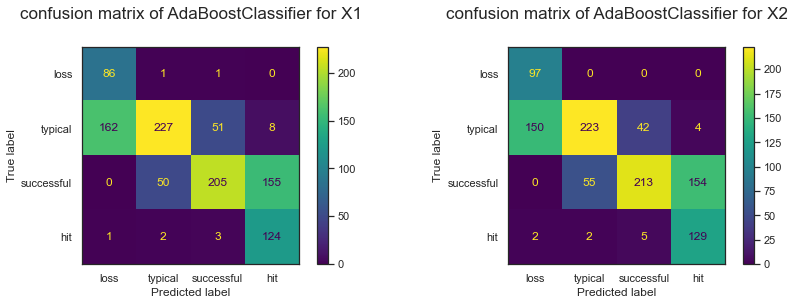

In [161]:
plot_estimator_confusion(best_ada1, best_ada2)